# Hard magnet tutorial

## Introduction

- In this notebook we explore hard magnet properties such as Hc as function of temperature for Fe16N2.
- We query databases to get temperature-dependent inputs for micromagnetic simulations from DFT and spin dynamics simulations
- We run hysteresis simulations and compute derived quantities.

Requirements:
- Software: `mammos`, `esys-escript`
- Basic understanding of [mammos-units](https://mammos-project.github.io/mammos/examples/mammos-units/quickstart.html) and [mammos-entity](https://mammos-project.github.io/mammos/examples/mammos-entity/quickstart.html)

The MODA diagram is provided at the bottom of the notebook.

In [1]:
%config InlineBackend.figure_format = "retina"

import math

import mammos_analysis
import mammos_dft
import mammos_entity as me
import mammos_mumag
import mammos_spindynamics
import mammos_units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colormaps

In [2]:
# Allow convenient conversions between A/m and T
u.set_enabled_equivalencies(u.magnetic_flux_field());

## DFT data: magnetization and anisotropy at zero Kelvin
The first step loads spontaneous magnetization `Ms_0` and the uniaxial anisotropy constant `K1_0` from a database of DFT calculations (at T=0K).

We can use the `print_info` flag to trigger printing of crystallographic information.

In [3]:
results_dft = mammos_dft.db.get_micromagnetic_properties("Fe16N2", print_info=True)

Found material in database.

Chemical Formula: Fe16N2
Space group name: P42/mnm
Space group number: 136
Cell length a: 8.78 Angstrom
Cell length b: 8.78 Angstrom
Cell length c: 12.12 Angstrom
Cell angle alpha: 90.0 deg
Cell angle beta: 90.0 deg
Cell angle gamma: 90.0 deg
Cell volume: 933.42 Angstrom3
ICSD_label: 
OQMD_label:

In [4]:
results_dft

MicromagneticProperties(Ms_0=Entity(ontology_label='SpontaneousMagnetization', value=1671126.902464901, unit='A / m'), Ku_0=Entity(ontology_label='UniaxialAnisotropyConstant', value=1100000.0, unit='J / m3'))

In [5]:
results_dft.Ms_0

Entity(ontology_label='SpontaneousMagnetization', value=1671126.902464901, unit='A / m')

In [6]:
results_dft.Ku_0

Entity(ontology_label='UniaxialAnisotropyConstant', value=1100000.0, unit='J / m3')

## Temperature-dependent magnetization data from spindynamics database lookup
In the second step we use a spin dynamics calculation database to load data for the temperature-dependent magnetization.

In [7]:
results_spindynamics = mammos_spindynamics.db.get_spontaneous_magnetization("Fe16N2")

We can visualize the pre-computed data using `.plot`.

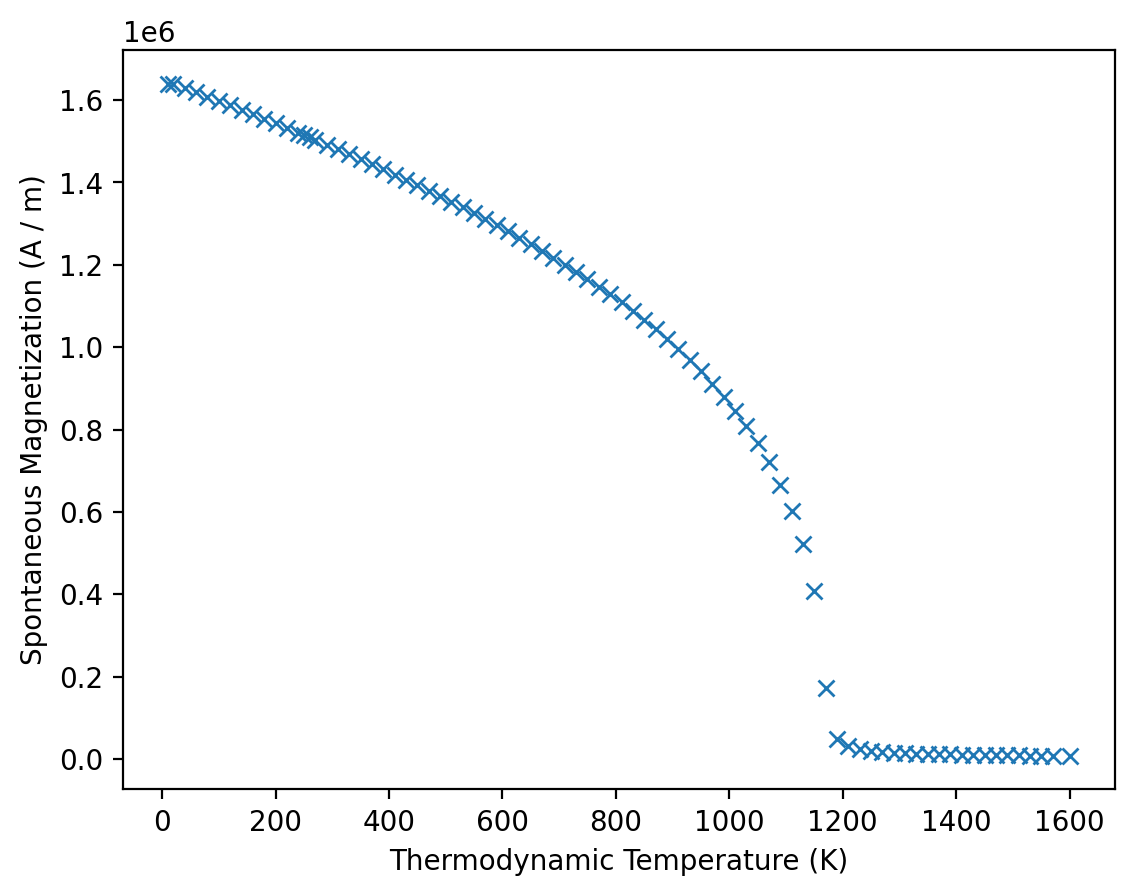

In [8]:
results_spindynamics.plot();

We can access `T` and `Ms` and get `mammos_entity.Entity` objects:

In [9]:
results_spindynamics.T

Entity(ontology_label='ThermodynamicTemperature', value=array([  10.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
        180.,  200.,  220.,  240.,  250.,  260.,  270.,  290.,  310.,
        330.,  350.,  370.,  390.,  410.,  430.,  450.,  470.,  490.,
        510.,  530.,  550.,  570.,  590.,  610.,  630.,  650.,  670.,
        690.,  710.,  730.,  750.,  770.,  790.,  810.,  830.,  850.,
        870.,  890.,  910.,  930.,  950.,  970.,  990., 1010., 1030.,
       1050., 1070., 1090., 1110., 1130., 1150., 1170., 1190., 1210.,
       1230., 1250., 1270., 1290., 1310., 1330., 1350., 1370., 1390.,
       1410., 1430., 1450., 1470., 1490., 1510., 1530., 1550., 1570.,
       1600.]), unit='K')

In [10]:
results_spindynamics.Ms

Entity(ontology_label='SpontaneousMagnetization', value=array([1639272.04060506, 1639375.49131807, 1629109.99748864,
       1618804.71492344, 1608308.44642653, 1597692.8117223 ,
       1587021.47278799, 1576206.89440489, 1565368.44278034,
       1554346.96297122, 1543229.99019625, 1531906.11599527,
       1520542.4530585 , 1514956.11455598, 1509250.40984613,
       1503385.5501932 , 1491950.26753205, 1479981.81581153,
       1467981.53310241, 1456148.36308352, 1444132.16488009,
       1431606.67085875, 1418874.2754114 , 1405958.85177949,
       1393528.85072402, 1380183.70874576, 1366997.7217106 ,
       1353159.19940876, 1339583.28276302, 1325235.46464328,
       1311126.37893819, 1296293.13824202, 1281237.08062553,
       1265600.10746675, 1250249.61320554, 1234525.10482806,
       1217774.04706764, 1200091.93289013, 1183277.21315247,
       1165443.90177902, 1146377.13959661, 1128058.40564674,
       1108681.2913253 , 1086869.10637455, 1065781.07641488,
       1044048.46893568, 1020732.26977272,  995935.929639  ,
        969261.5611768 ,  942356.41804711,  911663.38727184,
        878965.00421361,  844937.67738056,  808204.71651495,
        766450.41719479,  720597.87809002,  664272.9437298 ,
        601223.71302394,  523094.55146013,  407754.96420144,
        171823.67656201,   49003.80697799,   30979.50967284,
         24024.43865972,   20817.46655642,   17053.4521523 ,
         15780.21260756,   14578.59278722,   13249.6490124 ,
         12533.45176849,   11634.22634002,   11244.29672944,
         10520.14173837,   10026.76141479,    9803.94449446,
          9469.71911397,    9358.3106538 ,    8809.22610014,
          8554.57819119,    8284.01478793,    8164.64858061,
          7933.87391313]), unit='A / m')

We can get also the data in the form of a `pandas.DataFrame`, which only contains the values in SI units:

In [11]:
results_spindynamics.dataframe.head()

,T,Ms
0,10.0,1.639272e+06
1,20.0,1.639375e+06
2,40.0,1.629110e+06
3,60.0,1.618805e+06
4,80.0,1.608308e+06


## Calculate micromagnetic intrinsic properties using Kuz’min formula

- We use Kuz’min equations to compute Ms(T), A(T), K1(T)
- Kuz’min, M.D., Skokov, K.P., Diop, L.B. et al. Exchange stiffness of ferromagnets. Eur. Phys. J. Plus 135, 301 (2020). https://doi.org/10.1140/epjp/s13360-020-00294-y
- Additional details about inputs and outputs are available in the [API reference](https://mammos-project.github.io/mammos/api/mammos_analysis.kuzmin.html#mammos_analysis.kuzmin.kuzmin_formula)

In [12]:
results_kuzmin = mammos_analysis.kuzmin_properties(
    T=results_spindynamics.T,
    Ms=results_spindynamics.Ms,
    K1_0=results_dft.Ku_0,
)

The `plot` method of the returned object can be used to visualize temperature-dependence of all three quantities. The temperature range matches that of the fit data:

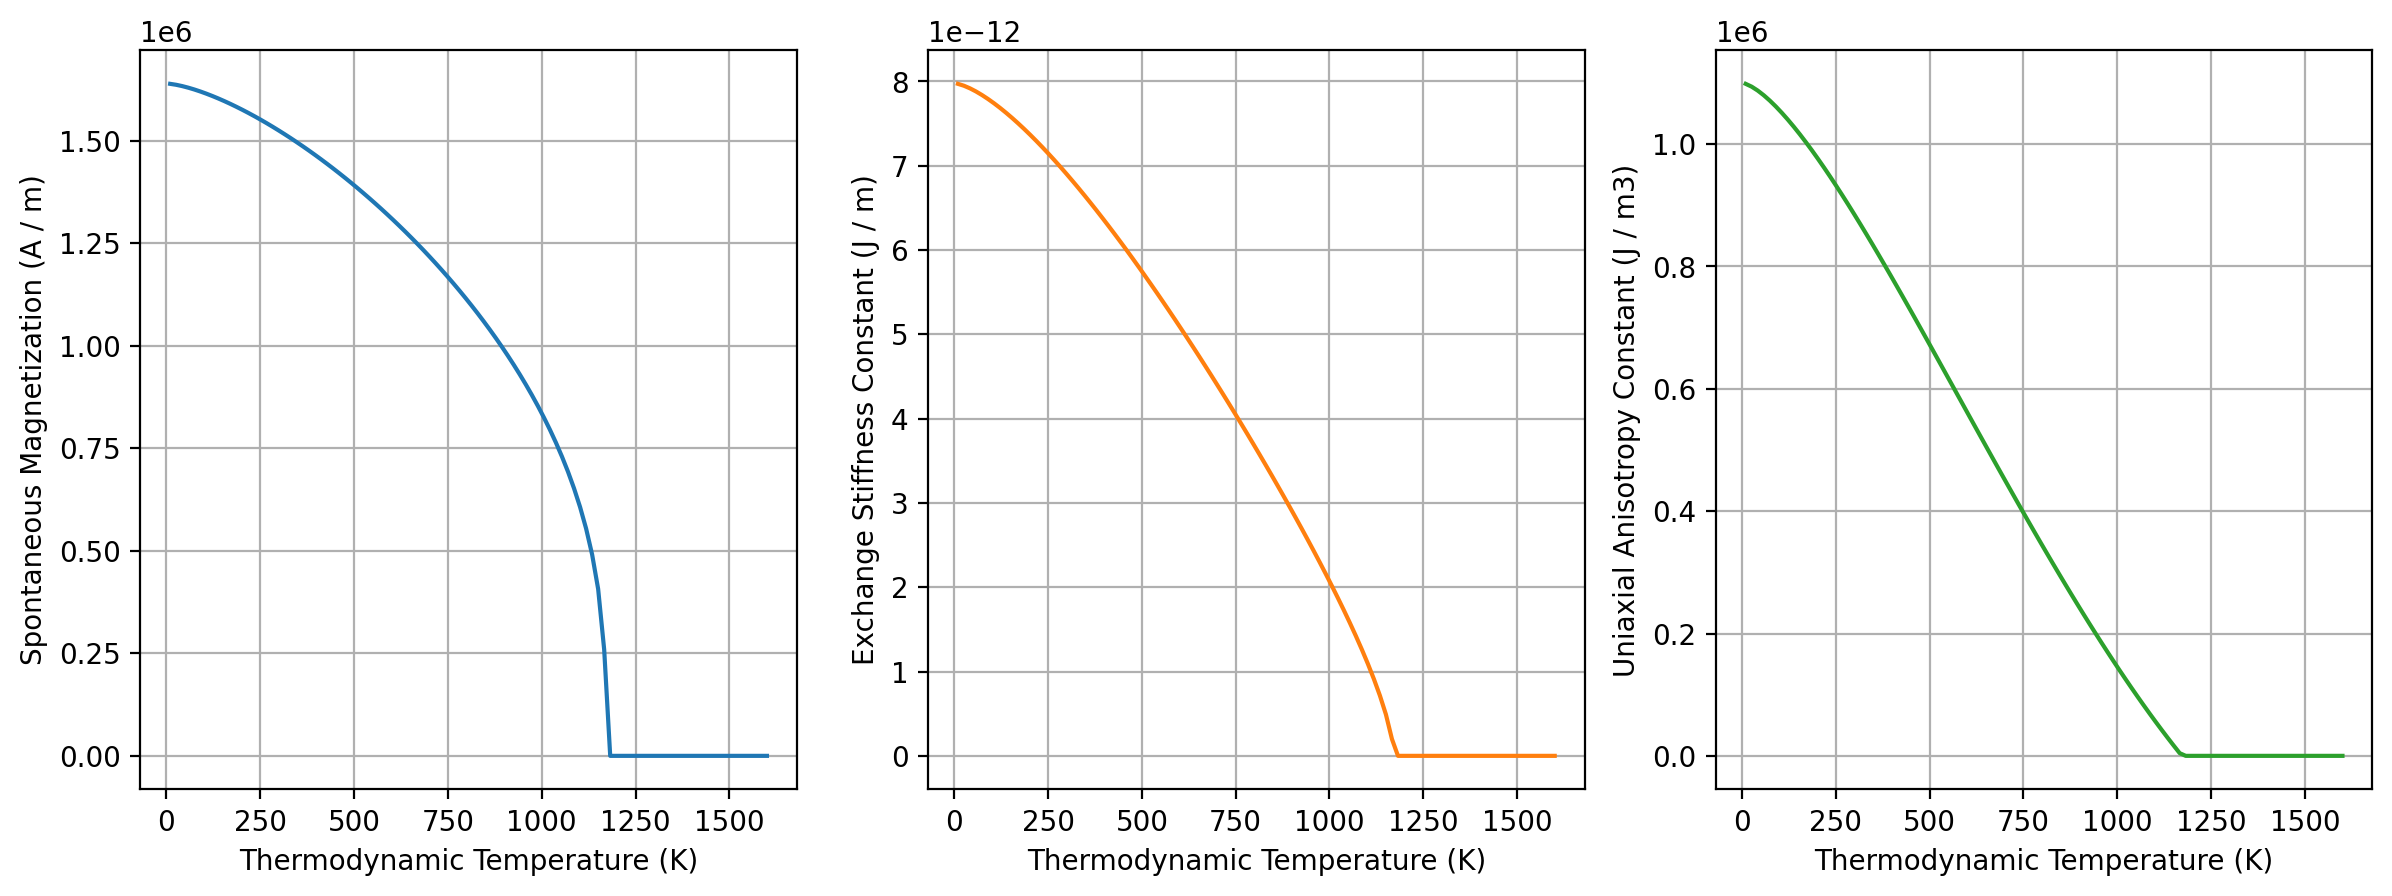

In [13]:
results_kuzmin.plot();

In [14]:
results_kuzmin

KuzminResult(Ms=Ms(T), A=A(T), Tc=Entity(ontology_label='CurieTemperature', value=1172.0436237460376, unit='K'), s=<Quantity 1.68812487>, K1=K1(T))

- The attributes `Ms`, `A` and `K1` provide fit results as function of temperature. They each have a `plot` method.
- `Tc` is the fitted Curie temperature.
- `s` is a fit parameter in the Kuzmin equation.

To visually assess the accuracy of the fit, we can combine the `plot` methods of `results_kuzmin.Ms` and `results_spindynamics`:

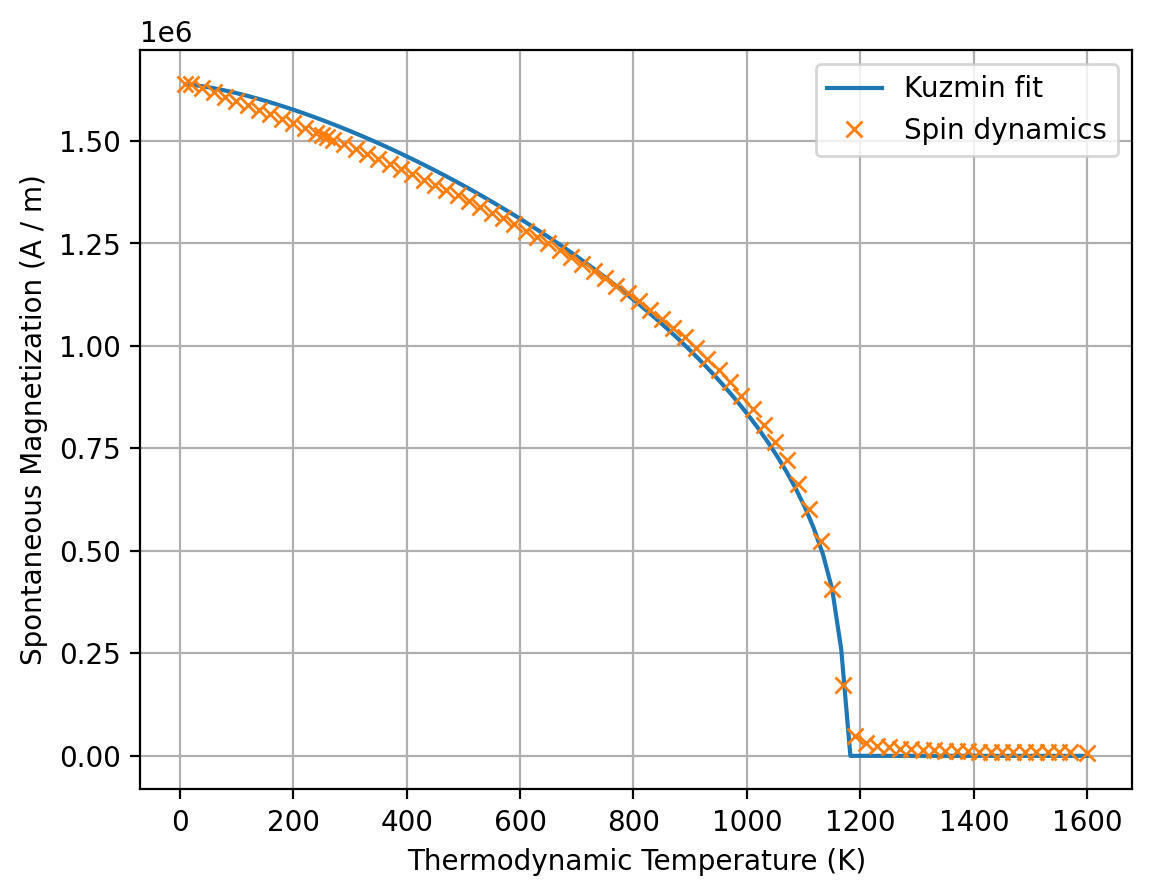

In [15]:
ax = results_kuzmin.Ms.plot(label="Kuzmin fit")
results_spindynamics.plot(ax=ax, label="Spin dynamics");

To get inputs for the micromagnetic simulation at a specific temperature we call the three attributes `Ms`, `A` and `K1`. We can pass a `mammos_entity.Entity`, an `astropy.units.Quantity` or a number:

In [16]:
temperature = me.T(300)
temperature

Entity(ontology_label='ThermodynamicTemperature', value=300.0, unit='K')

In [17]:
results_kuzmin.Ms(temperature)  # Evaluation with Entity

Entity(ontology_label='SpontaneousMagnetization', value=1524423.0846149668, unit='A / m')

In [18]:
results_kuzmin.A(300 * u.K)  # Evaluation with Quantity

Entity(ontology_label='ExchangeStiffnessConstant', value=6.900134493591248e-12, unit='J / m')

In [19]:
results_kuzmin.K1(300)  # Evaluation with number

Entity(ontology_label='UniaxialAnisotropyConstant', value=884618.7505803768, unit='J / m3')

## Run micromagnetic simulation to compute hysteresis loop
- We now compute a hysteresis loop (using a finite-element micromagnetic simulation) with the material parameters we have obtained.
- We simulate a 20x20x20 nm cube for which a pre-defined mesh is available.
- Additional documentation of this step is available [this notebook](https://mammos-project.github.io/mammos/examples/mammos-mumag/quickstart.html).

In [20]:
results_hysteresis = mammos_mumag.hysteresis.run(
    mesh="cube20_singlegrain_msize2",
    Ms=results_kuzmin.Ms(temperature),
    A=results_kuzmin.A(temperature),
    K1=results_kuzmin.K1(temperature),
    hstart=(1.5 * u.T).to(u.A / u.m),
    hfinal=(-1.5 * u.T).to(u.A / u.m),
    hnsteps=30,
)

The returned `results_hysteresis` object provides a `plot` method to visualize the computed data. `mammos_mumag.hysteresis` only computes half a hysteresis loop, going from `hstart` to `hfinal`. To show a full loop this function mirrors the computed data and plots it twice:

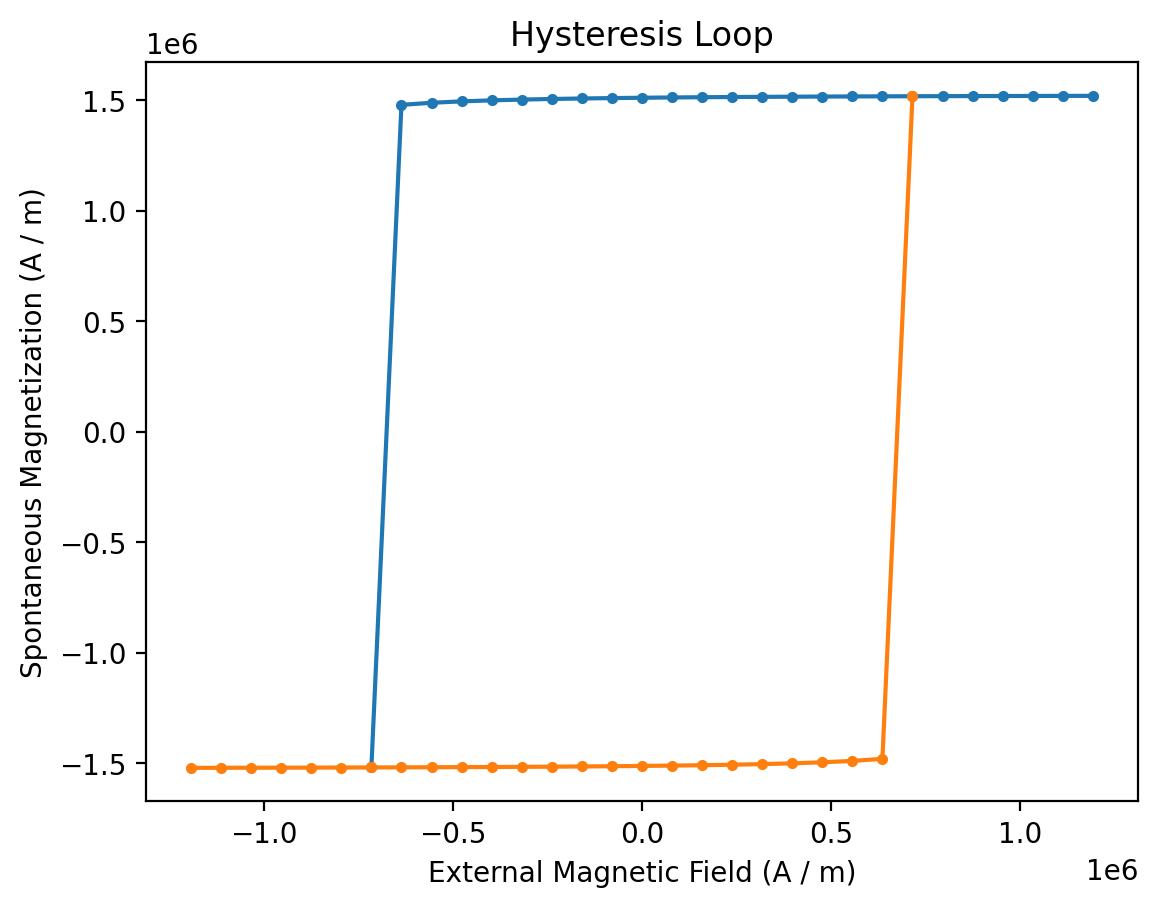

In [21]:
results_hysteresis.plot(marker=".");  # blue: simulation output, orange: mirrored data

The result object provides access to `H` and `M`:

In [22]:
results_hysteresis.H

Entity(ontology_label='ExternalMagneticField', value=array([ 1.19366207e+06,  1.11408460e+06,  1.03450713e+06,  9.54929658e+05,
        8.75352187e+05,  7.95774715e+05,  7.16197244e+05,  6.36619772e+05,
        5.57042301e+05,  4.77464829e+05,  3.97887358e+05,  3.18309886e+05,
        2.38732415e+05,  1.59154943e+05,  7.95774715e+04, -1.54610297e-10,
       -7.95774715e+04, -1.59154943e+05, -2.38732415e+05, -3.18309886e+05,
       -3.97887358e+05, -4.77464829e+05, -5.57042301e+05, -6.36619772e+05,
       -7.16197244e+05]), unit='A / m')

In [23]:
results_hysteresis.M

Entity(ontology_label='SpontaneousMagnetization', value=array([ 1520766.013009  ,  1520536.21568872,  1520283.85569113,
        1520005.85023569,  1519698.57094272,  1519357.72591793,
        1518978.18846253,  1518553.8059693 ,  1518077.13855399,
        1517539.11549093,  1516928.58340324,  1516231.66429845,
        1515430.99575185,  1514504.4606133 ,  1513423.54754873,
        1512151.01440216,  1510637.09586167,  1508814.10104618,
        1506587.02390118,  1503818.96330002,  1500301.57962117,
        1495697.8953036 ,  1489396.80227781,  1480008.49864671,
       -1518978.1873603 ]), unit='A / m')

The `dataframe` property generates a dataframe in the SI units.

In [24]:
results_hysteresis.dataframe.head()

,configuration_type,H,M,Mx,My,Mz,energy_density
0,1,1.193662e+06,1.520766e+06,14711.578420,-417.815809,1.520741e+06,-2.747357e+06
1,1,1.114085e+06,1.520536e+06,14247.759086,-433.694350,1.520519e+06,-2.595292e+06
2,1,1.034507e+06,1.520284e+06,13746.592815,-450.795760,1.520275e+06,-2.443251e+06
3,1,9.549297e+05,1.520006e+06,13203.070055,-469.299535,1.520007e+06,-2.291236e+06
4,1,8.753522e+05,1.519699e+06,12611.705100,-489.276578,1.519710e+06,-2.139250e+06


We can generate a table in alternate units:

In [25]:
df = pd.DataFrame(
    {
        "mu0_H": results_hysteresis.H.q.to(u.T),
        "J": results_hysteresis.M.q.to(u.T),
    },
)
df.head()

,mu0_H,J
0,1.5,1.911051
1,1.4,1.910762
2,1.3,1.910445
3,1.2,1.910096
4,1.1,1.909710


### Plotting of magnetization configurations

Simulation stores specific magnetization field configurations:

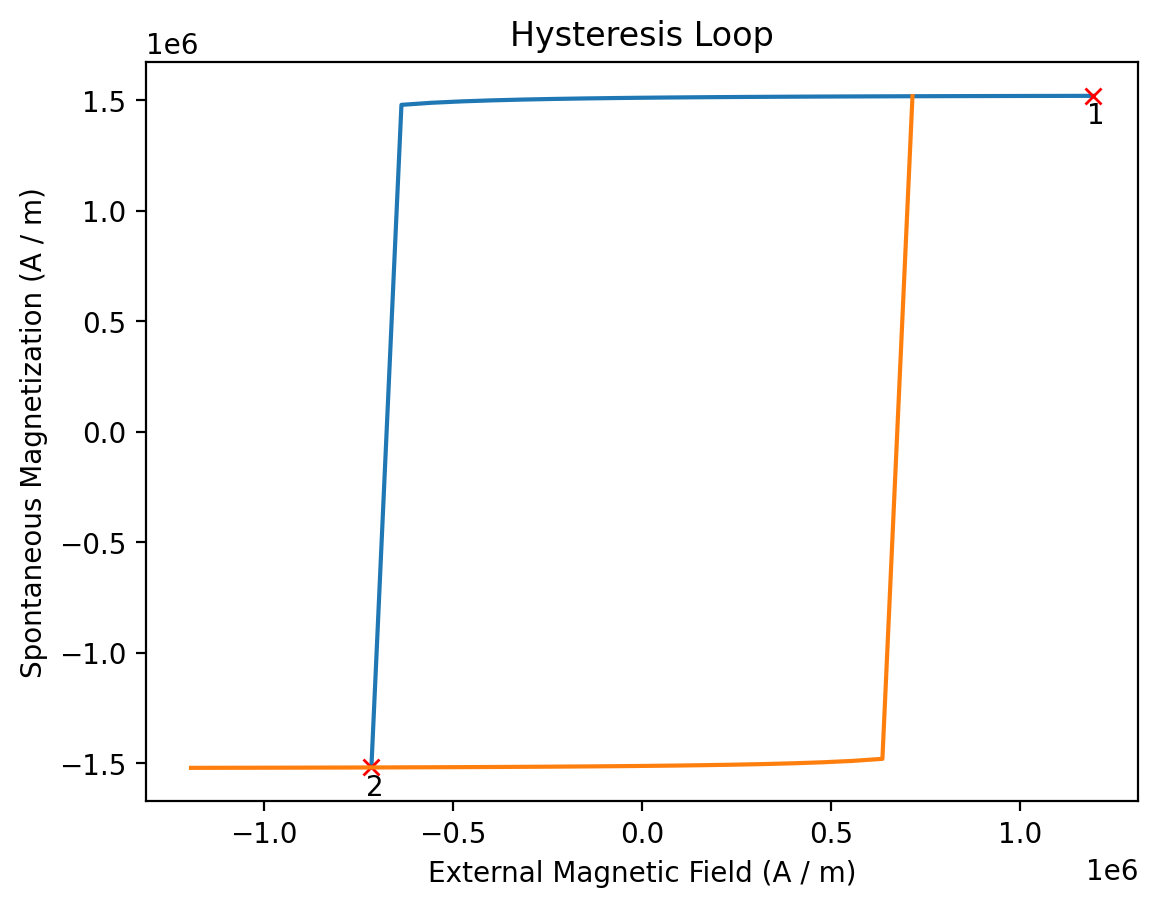

In [26]:
results_hysteresis.plot(configuration_marks=True);

In [27]:
results_hysteresis.configurations

{1: PosixPath('/home/sam/repos/mammos-devtools/packages/mammos/examples/hystloop/hystloop_0001.vtu'),
 2: PosixPath('/home/sam/repos/mammos-devtools/packages/mammos/examples/hystloop/hystloop_0002.vtu')}

In [28]:
results_hysteresis.plot_configuration(1);

Widget(value='<iframe src="http://localhost:40261/index.html?ui=P_0x7f346a853b90_0&reconnect=auto" class="pyvi…

## Analyze hysteresis loop
We can extract extrinsic properties with the `extrinsic_properties` function from the `mammos_analysis` package:

In [29]:
extrinsic_properties = mammos_analysis.hysteresis.extrinsic_properties(
    results_hysteresis.H,
    results_hysteresis.M,
    demagnetization_coefficient=1 / 3,
)

In [30]:
extrinsic_properties.Hc

Entity(ontology_label='CoercivityHcExternal', value=675891.4815868669, unit='A / m')

In [31]:
extrinsic_properties.Mr

Entity(ontology_label='Remanence', value=1512151.0144021625, unit='A / m')

In [32]:
extrinsic_properties.BHmax

Entity(ontology_label='MaximumEnergyProduct', value=311800.26071198203, unit='A T / m')

We can combine the `results_hysteresis.plot` method with some custom code to show Hc and Mr in the hysteresis plot:

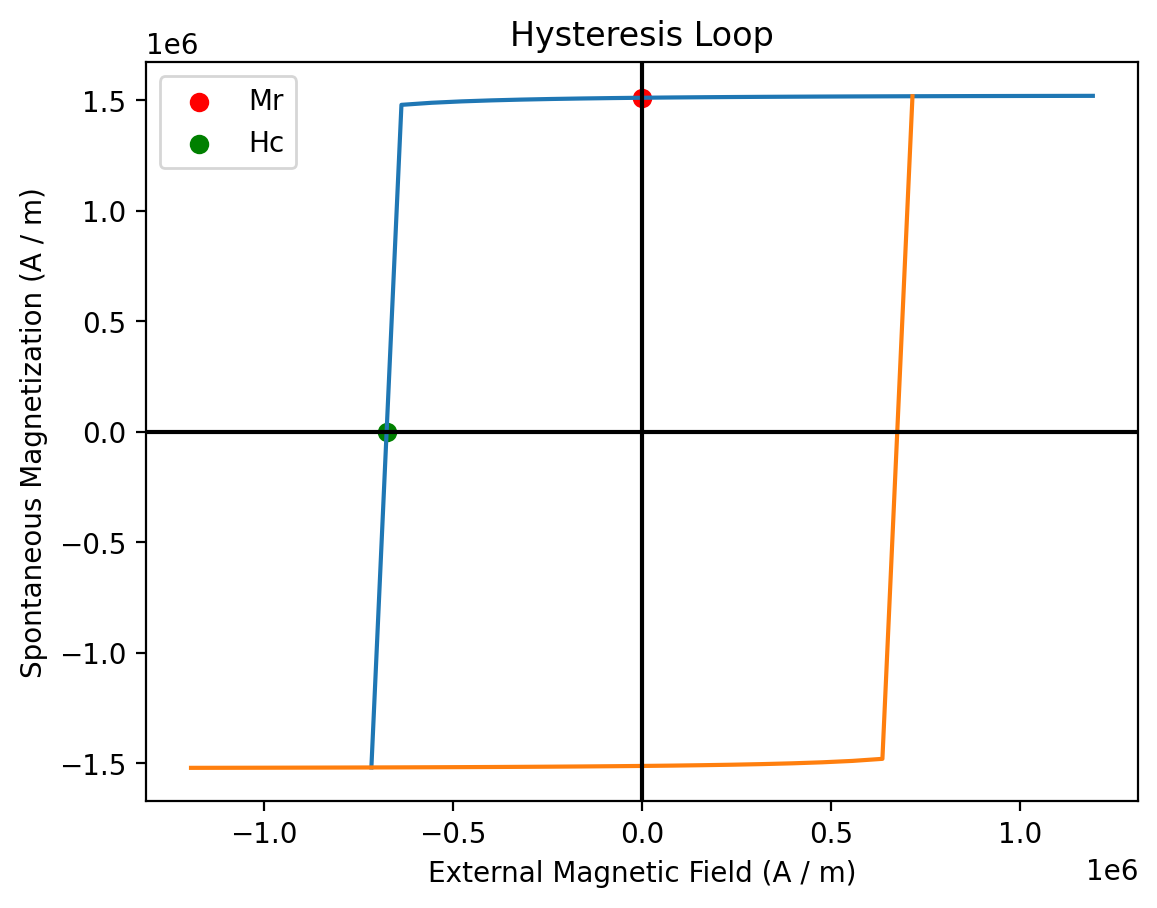

In [33]:
ax = results_hysteresis.plot()
ax.scatter(0, extrinsic_properties.Mr.value, c="r", label="Mr")
ax.scatter(-extrinsic_properties.Hc.value, 0, c="g", label="Hc")
ax.axhline(0, c="k")  # Horizontal line at M=0
ax.axvline(0, c="k")  # Vertical line at H=0
ax.legend();

## Compute Hc(T)

We can leverage mammos to calculate Hc(T) for multiple values of T.

First, we run hysteresis simulations at 7 different temperatures and collect all simulation results:

In [34]:
T = np.linspace(0, 1.1 * results_kuzmin.Tc.q, 7)

simulations = []
for temperature in T:
    print(f"Running simulation for T={temperature:.0f}")
    results_hysteresis = mammos_mumag.hysteresis.run(
        mesh="cube20_singlegrain_msize2",
        Ms=results_kuzmin.Ms(temperature),
        A=results_kuzmin.A(temperature),
        K1=results_kuzmin.K1(temperature),
        hstart=(1.5 * u.T).to(u.A / u.m),
        hfinal=(-1.5 * u.T).to(u.A / u.m),
        hnsteps=30,
    )
    simulations.append(results_hysteresis)

Running simulation for T=0 K
Running simulation for T=215 K
Running simulation for T=430 K
Running simulation for T=645 K
Running simulation for T=859 K
Running simulation for T=1074 K
Running simulation for T=1289 K


We can now use `mammos_analysis.hysteresis` as shown before to extract Hc for all simulations and visualize Hc(T):

In [35]:
Hcs = []
for res in simulations:
    cf = mammos_analysis.hysteresis.extract_coercive_field(H=res.H, M=res.M).value
    if np.isnan(cf):  # Above Tc
        cf = 0
    Hcs.append(cf)

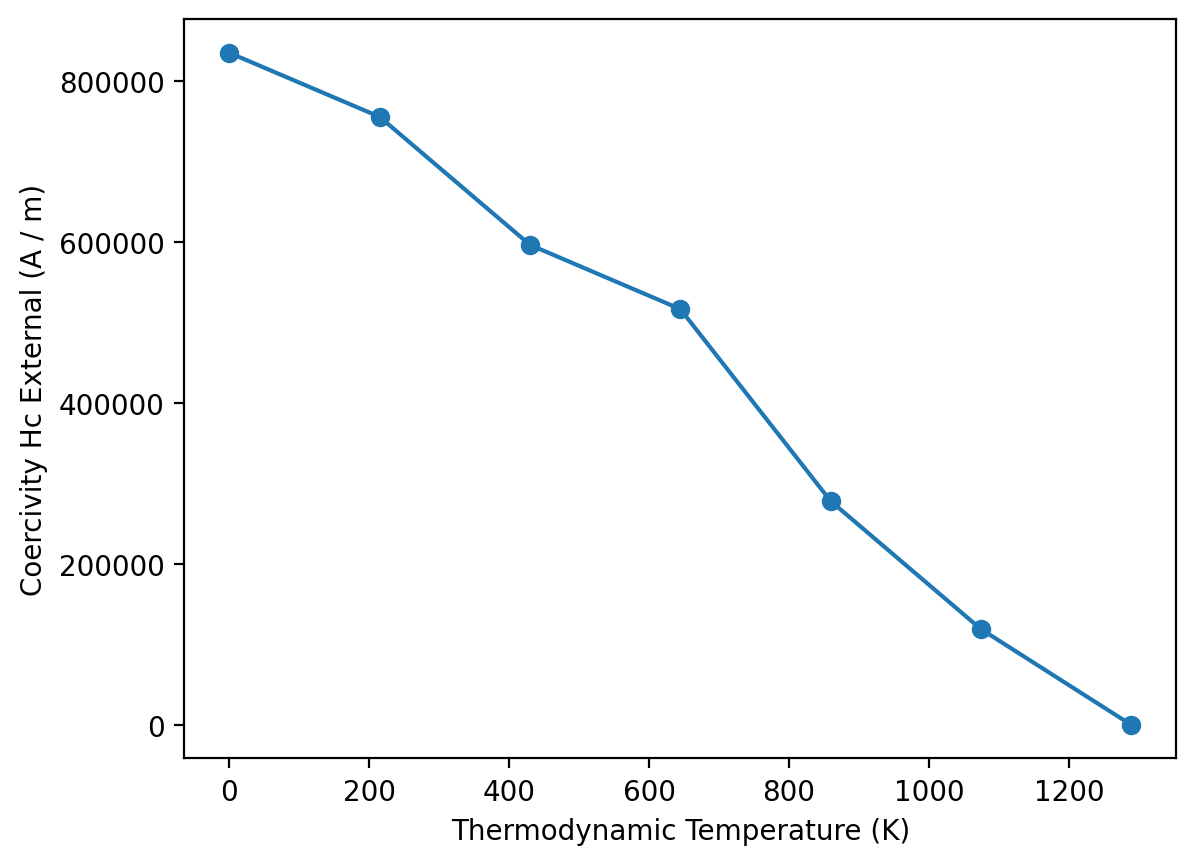

In [36]:
plt.plot(T, Hcs, linestyle="-", marker="o")
plt.xlabel(me.T().axis_label)
plt.ylabel(me.Hc().axis_label);

We can also show the hysteresis loops of all simulations:

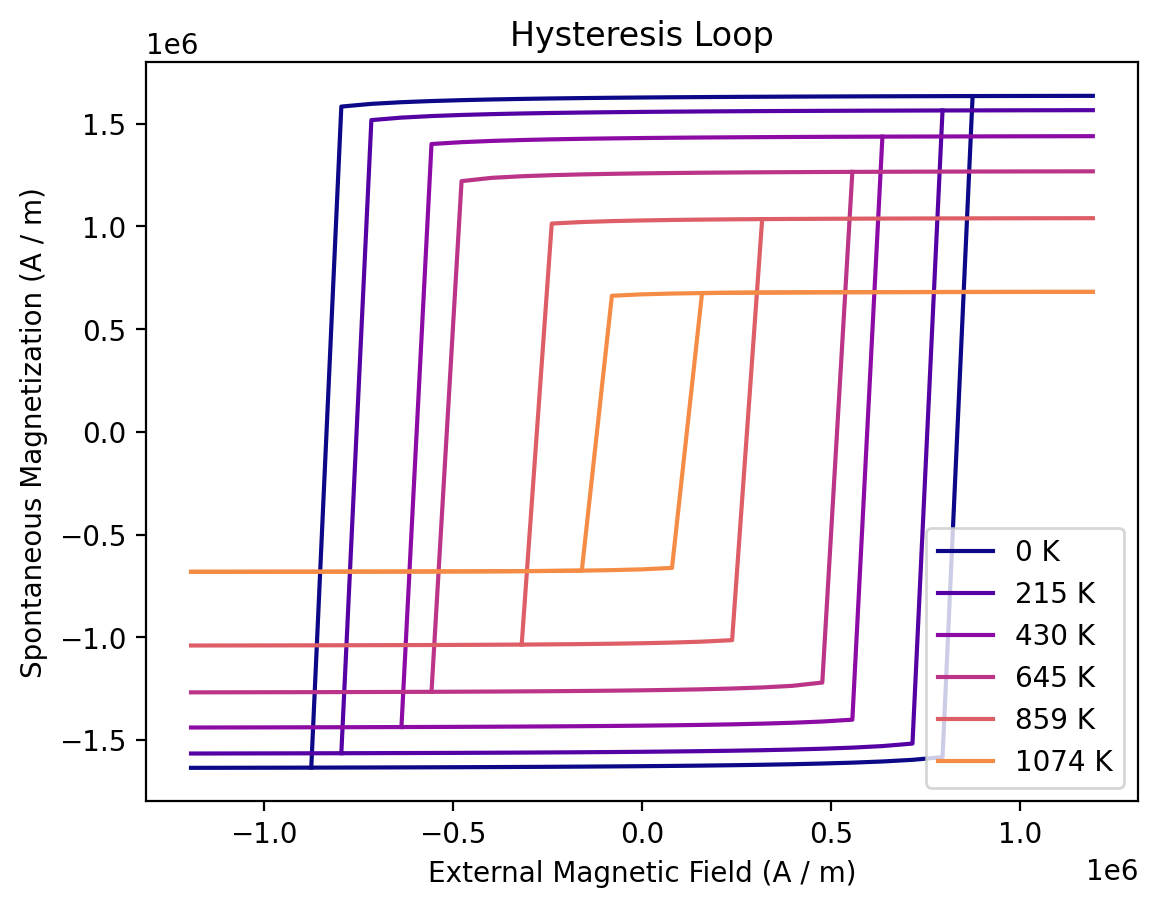

In [37]:
colors = colormaps["plasma"].colors[:: math.ceil(256 / len(T))]

fix, ax = plt.subplots()
for temperature, sim, color in zip(T, simulations, colors, strict=False):
    if np.isnan(sim.M.q).all():  # no Ms above Tc
        continue
    sim.plot(ax=ax, label=f"{temperature:.0f}", color=color, duplicate_change_color=False)
ax.legend(loc="lower right");

## MODA for the workflow
![MODA](images/hard_magnet_workflow.svg)